# Formatando Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math

In [2]:
spreadsheet = pd.read_csv('./orderedDataset.csv')

In [3]:
spreadsheet.shape

(1490, 3)

In [4]:
spreadsheet = spreadsheet.loc[spreadsheet["Valor"] != 0]
spreadsheet.shape

(1486, 3)

In [5]:
spreadsheet = spreadsheet.loc[spreadsheet["Valor"] != 1]
spreadsheet.shape

(1485, 3)

In [6]:
spreadsheet = spreadsheet.loc[spreadsheet["Valor"] != 6]
spreadsheet.shape

(1484, 3)

In [7]:
spreadsheet = spreadsheet.loc[spreadsheet["Valor"] != 100]
spreadsheet.shape

(1482, 3)

In [8]:
spreadsheet.head()

,Modelo,Valor,Local
8,Iphone 6s,200.0,Aquiraz
9,iPhone 5s,250.0,Fortaleza Vila União
10,iPhone 6s - seminovo acompanha caixa,300.0,Fortaleza Benfica
11,iPhone SE 1ª Geração,300.0,Fortaleza Fátima
12,iPhone 6 128gb,300.0,Fortaleza Vicente Pinzon


In [9]:
#deixando o dataset em caixa alta, já que o python é case sensitive e os usuários da olx escrevem os nomes dos produtos
#de forma não padronizada
spreadsheet = spreadsheet.apply(lambda x: x.astype(str).str.upper())

In [10]:
spreadsheet.head()

,Modelo,Valor,Local
8,IPHONE 6S,200.0,AQUIRAZ
9,IPHONE 5S,250.0,FORTALEZA VILA UNIÃO
10,IPHONE 6S - SEMINOVO ACOMPANHA CAIXA,300.0,FORTALEZA BENFICA
11,IPHONE SE 1ª GERAÇÃO,300.0,FORTALEZA FÁTIMA
12,IPHONE 6 128GB,300.0,FORTALEZA VICENTE PINZON


In [11]:
spreadsheet = spreadsheet[~spreadsheet['Modelo'].isin(['IPHONE'])]

In [12]:
spreadsheet = spreadsheet[~spreadsheet['Modelo'].isin(['PRÓ'])]

In [13]:
spreadsheet = spreadsheet[~spreadsheet['Modelo'].isin(['TROCO'])]

In [14]:
spreadsheet

,Modelo,Valor,Local
8,IPHONE 6S,200.0,AQUIRAZ
9,IPHONE 5S,250.0,FORTALEZA VILA UNIÃO
10,IPHONE 6S - SEMINOVO ACOMPANHA CAIXA,300.0,FORTALEZA BENFICA
11,IPHONE SE 1ª GERAÇÃO,300.0,FORTALEZA FÁTIMA
12,IPHONE 6 128GB,300.0,FORTALEZA VICENTE PINZON
...,...,...,...
1485,IPHONE 14 PRO MAX 256GB - CHIP FÍSICO - GARANT...,7399.0,FORTALEZA MEIRELES
1486,VENDO IPHONE 13 PRO MAX,7500.0,FORTALEZA PARQUE PRESIDENTE VARGAS
1487,IPHONE 14 PRO MAX 256GB,7500.0,FORTALEZA MANOEL SÁTIRO
1488,IPHONE 14 PRO MAX,7500.0,FORTALEZA MUCURIPE


In [15]:
spreadsheet.to_csv('dataset.csv', index=False)

In [16]:
dataSet_df = pd.read_csv('./dataset.csv')

# Editando o Dataset de novo

In [17]:
#iPhone 6
dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & ~dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 6'
dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 6 PLUS'
#iPhone 6S
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & ~dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 6S'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 6S PLUS'
#iPhone 7
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & ~dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 7'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 7 PLUS'
#iPhone 8
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & ~dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 8'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & dataSet_df['Modelo'].str.contains('PLUS'), ['Modelo']] = 'IPHONE 8 PLUS'
#iPhone X
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE X') & ~dataSet_df['Modelo'].str.contains('S'), ['Modelo']] = 'IPHONE X'
#iPhone XR
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE XR'), ['Modelo']] = 'IPHONE XR'
#iPhone XS
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE XS') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE XS'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE XS') & dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE XS MAX'
#iPhone 11
i11 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 11'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 11 PRO'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 11 PRO MAX'
#iPhone 12
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 12'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 12 PRO'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 12 PRO MAX'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 12 MINI'
#iPhone SE
iSE = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE SE'), ['Modelo']] = 'IPHONE SE'
#iPhone 13
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 13'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 13 PRO'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 13 PRO MAX'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 13 MINI'
#iPhone 14
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('PLUS') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 14'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('PLUS') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 14 PRO'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('PLUS') & dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 14 PRO MAX'
dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('PLUS') & ~dataSet_df['Modelo'].str.contains('MAX'), ['Modelo']] = 'IPHONE 14 MINI'
dataSet_df

,Modelo,Valor,Local
0,IPHONE 6S,200.0,AQUIRAZ
1,IPHONE 5S,250.0,FORTALEZA VILA UNIÃO
2,IPHONE 6S,300.0,FORTALEZA BENFICA
3,IPHONE SE,300.0,FORTALEZA FÁTIMA
4,IPHONE 6,300.0,FORTALEZA VICENTE PINZON
...,...,...,...
1475,IPHONE 14 PRO MAX,7399.0,FORTALEZA MEIRELES
1476,IPHONE 13 PRO MAX,7500.0,FORTALEZA PARQUE PRESIDENTE VARGAS
1477,IPHONE 14 PRO MAX,7500.0,FORTALEZA MANOEL SÁTIRO
1478,IPHONE 14 PRO MAX,7500.0,FORTALEZA MUCURIPE


***
# Medidas de Tendência Central

In [18]:
#dataset final sem linhas que o codigo não conseguiu remover ou utilizar
dataSet_df = pd.read_csv('./finalDataset.csv')

### Média

In [19]:
print("Média dos valores:", dataSet_df['Valor'].mean())

Média dos valores: 2152.8060941828253


In [88]:
print("Média de valor por Modelo:")
#iPhone 6
i6 = dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
i6Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
#iPhone 6S
i6S = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
i6SPlus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
#iPhone 7
i7 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
i7Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
#iPhone 8
i8 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
i8Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].mean()
#iPhone X
i10 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10|IPHONE X') & ~dataSet_df['Modelo'].str.contains('S')]['Valor'].mean()
#iPhone XR
i10R = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10R|IPHONE XR')]['Valor'].mean()
#iPhone XS
i10S = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10S|IPHONE XS') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i10SM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10S|IPHONE XS') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
#iPhone 11
i11 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i11Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i11ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
#iPhone 12
i12 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i12Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i12ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i12Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
#iPhone SE
iSE = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE SE')]['Valor'].mean()
#iPhone 13
i13 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i13Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i13ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i13Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
#iPhone 14
i14 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i14Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i14ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
i14Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].mean()
print("----------Modelos 6----------")
print("iPhone 6:", i6)
print("iPhone 6 Plus:", i6Plus)
print("iPhone 6S:", i6S)
print("iPhone 6S:", i6SPlus)
print("----------Modelos 7----------")
print("iPhone 7:", i7)
print("iPhone 7 Plus:", i7Plus)
#iPhone 8
print("----------Modelos 8----------")
print("iPhone 8:", i8)
print("iPhone 8 Plus:", i8Plus)
#iPhone X
print("----------Modelos X----------")
print("iPhone X:", i10)
#iPhone XR
print("iPhone XR:", i10R)
#iPhone XS
print("iPhone XS:", i10S)
print("iPhone XS Max:", i10SM)
#iPhone 11
print("----------Modelos 11----------")
print("iPhone 11:", i11)
print("iPhone 11 Pro:", i11Pro)
print("iPhone 11 Pro:", i11ProM)
#iPhone 12
print("----------Modelos 12----------")
print("iPhone 12 Mini:", i12Mini)
print("iPhone 12:", i12)
print("iPhone 12 Pro:", i12Pro)
print("iPhone 12 Pro Max:", i12ProM)
#iPhone SE
print("----------Modelos SE----------")
print("iPhone SE:", iSE)
#iPhone 13
print("----------Modelos 13----------")
print("iPhone 13 Mini:", i13Mini)
print("iPhone 13:", i13)
print("iPhone 13 Pro:", i13Pro)
print("iPhone 13 Pro Max:", i13ProM)
#iPhone 14
print("----------Modelos 13----------")
print("iPhone 14 Mini:", i14Mini)
print("iPhone 14:", i14)
print("iPhone 14 Pro:", i14Pro)
print("iPhone 14 Pro Max:", i14ProM)

Média de valor por Modelo:
----------Modelos 6----------
iPhone 6: 579.0833333333334
iPhone 6 Plus: 476.6666666666667
iPhone 6S: 499.1875
iPhone 6S: 508.3333333333333
----------Modelos 7----------
iPhone 7: 686.6288659793814
iPhone 7 Plus: 953.1224489795918
----------Modelos 8----------
iPhone 8: 973.741935483871
iPhone 8 Plus: 1351.5341614906831
----------Modelos X----------
iPhone X: 1679.9608695652173
iPhone XR: 1743.1
iPhone XS: 1665.92
iPhone XS Max: 2114.483870967742
----------Modelos 11----------
iPhone 11: 2332.176470588235
iPhone 11 Pro: 2807.0285714285715
iPhone 11 Pro: 3185.3939393939395
----------Modelos 12----------
iPhone 12 Mini: 2484.0
iPhone 12: 3187.054054054054
iPhone 12 Pro: 3876.235294117647
iPhone 12 Pro Max: 4554.11320754717
----------Modelos SE----------
iPhone SE: 1318.76
----------Modelos 13----------
iPhone 13 Mini: 3550.0
iPhone 13: 4215.578947368421
iPhone 13 Pro: 5403.066666666667
iPhone 13 Pro Max: 5706.204545454545
----------Modelos 13----------
iPhone 1

### Mediana

In [87]:
print("Medianas de valor por Modelo:")
#iPhone 6
i6 = dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
i6Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains(r'\bIPHONE 6\b') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
#iPhone 6S
i6S = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
i6SPlus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 6S') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
#iPhone 7
i7 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
i7Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 7') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
#iPhone 8
i8 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & ~dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
i8Plus = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 8') & dataSet_df['Modelo'].str.contains('PLUS')]['Valor'].median()
#iPhone X
i10 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10|IPHONE X') & ~dataSet_df['Modelo'].str.contains('S')]['Valor'].median()
#iPhone XR
i10R = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10R|IPHONE XR')]['Valor'].median()
#iPhone XS
i10S = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10S|IPHONE XS') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i10SM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 10S|IPHONE XS') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
#iPhone 11
i11 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i11Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i11ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 11') & dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
#iPhone 12
i12 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i12Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i12ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i12Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 12') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
#iPhone SE
iSE = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE SE')]['Valor'].mean()
#iPhone 13
i13 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i13Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i13ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i13Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 13') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
#iPhone 14
i14 = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i14Pro = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i14ProM = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & dataSet_df['Modelo'].str.contains('PRO') & ~dataSet_df['Modelo'].str.contains('MINI') & dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
i14Mini = dataSet_df.loc[dataSet_df['Modelo'].str.contains('IPHONE 14') & ~dataSet_df['Modelo'].str.contains('PRO') & dataSet_df['Modelo'].str.contains('MINI') & ~dataSet_df['Modelo'].str.contains('MAX')]['Valor'].median()
print("----------Modelos 6----------")
print("iPhone 6:", i6)
print("iPhone 6 Plus:", i6Plus)
print("iPhone 6S:", i6S)
print("iPhone 6S:", i6SPlus)
print("----------Modelos 7----------")
print("iPhone 7:", i7)
print("iPhone 7 Plus:", i7Plus)
#iPhone 8
print("----------Modelos 8----------")
print("iPhone 8:", i8)
print("iPhone 8 Plus:", i8Plus)
#iPhone X
print("----------Modelos X----------")
print("iPhone X:", i10)
#iPhone XR
print("iPhone XR:", i10R)
#iPhone XS
print("iPhone XS:", i10S)
print("iPhone XS Max:", i10SM)
#iPhone 11
print("----------Modelos 11----------")
print("iPhone 11:", i11)
print("iPhone 11 Pro:", i11Pro)
print("iPhone 11 Pro:", i11ProM)
#iPhone 12
print("----------Modelos 12----------")
print("iPhone 12 Mini:", i12Mini)
print("iPhone 12:", i12)
print("iPhone 12 Pro:", i12Pro)
print("iPhone 12 Pro Max:", i12ProM)
#iPhone SE
print("----------Modelos SE----------")
print("iPhone SE:", iSE)
#iPhone 13
print("----------Modelos 13----------")
print("iPhone 13 Mini:", i13Mini)
print("iPhone 13:", i13)
print("iPhone 13 Pro:", i13Pro)
print("iPhone 13 Pro Max:", i13ProM)
#iPhone 14
print("----------Modelos 13----------")
print("iPhone 14 Mini:", i14Mini)
print("iPhone 14:", i14)
print("iPhone 14 Pro:", i14Pro)
print("iPhone 14 Pro Max:", i14ProM)

Medianas de valor por Modelo:
----------Modelos 6----------
iPhone 6: 600.0
iPhone 6 Plus: 480.0
iPhone 6S: 500.0
iPhone 6S: 500.0
----------Modelos 7----------
iPhone 7: 680.0
iPhone 7 Plus: 950.0
----------Modelos 8----------
iPhone 8: 950.0
iPhone 8 Plus: 1300.0
----------Modelos X----------
iPhone X: 1700.0
iPhone XR: 1850.0
iPhone XS: 1649.0
iPhone XS Max: 2000.0
----------Modelos 11----------
iPhone 11: 2300.0
iPhone 11 Pro: 2899.0
iPhone 11 Pro: 3200.0
----------Modelos 12----------
iPhone 12 Mini: 2500.0
iPhone 12: 3099.5
iPhone 12 Pro: 4000.0
iPhone 12 Pro Max: 4500.0
----------Modelos SE----------
iPhone SE: 1318.76
----------Modelos 13----------
iPhone 13 Mini: 3550.0
iPhone 13: 4000.0
iPhone 13 Pro: 5299.0
iPhone 13 Pro Max: 5749.0
----------Modelos 13----------
iPhone 14 Mini: 5250.0
iPhone 14: 4600.0
iPhone 14 Pro: 6299.0
iPhone 14 Pro Max: 7190.0


***
# Medidas de Variabilidade

In [22]:
mediaValor = dataSet_df['Valor'].mean()
mediaValor

2152.8060941828253

### Desvio

In [23]:
desvio = dataSet_df['Valor'].apply(lambda x: x - mediaValor)
desvio

0      -1952.806094
1      -1902.806094
2      -1852.806094
3      -1852.806094
4      -1852.806094
           ...     
1439    5246.193906
1440    5347.193906
1441    5347.193906
1442    5347.193906
1443    5347.193906
Name: Valor, Length: 1444, dtype: float64

### Média do Desvio Absoluto

In [24]:
acc = 0
for i in range(len(dataSet_df)):
    acc += abs((dataSet_df['Valor'].loc[i] - mediaValor))
acc = acc/len(dataSet_df)
acc 

1053.6982527758296

### Variância

In [25]:
dataSet_df['Valor'].var()

1878169.4703439889

### Desvio Padrão

In [26]:
dataSet_df['Valor'].std()

1370.4632320292249

### Boxplot

<Axes: >

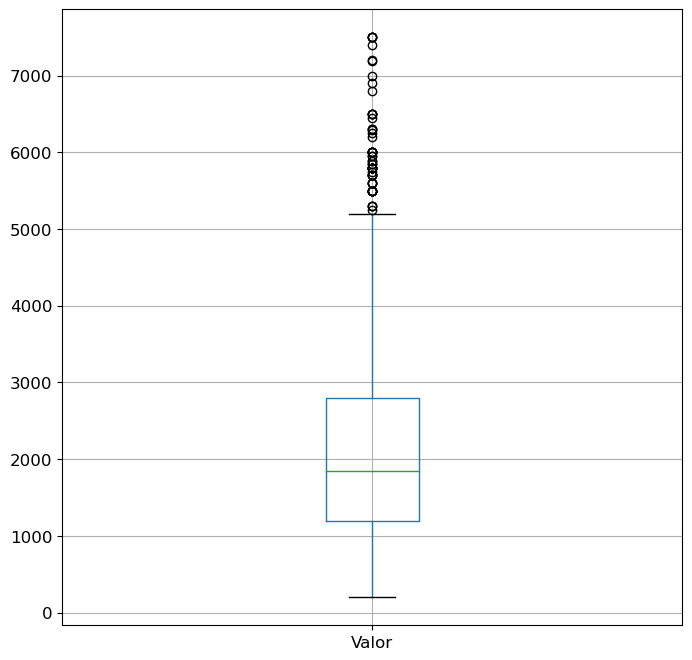

In [27]:
dataSet_df.boxplot(column=['Valor'], fontsize='large', figsize=(8,8))

***
# Tabela de Frequência e Histograma

### Tabela de Frequência

In [65]:
frequencia_modelo = dataSet_df['Modelo'].value_counts()
print("Modelo")
print(frequencia_modelo.head(30))

print("\n\n\n")
frequencia_local = dataSet_df['Local'].value_counts()
print("Local")
print(frequencia_local.head(30))

Modelo
IPHONE 11            255
IPHONE X             199
IPHONE 8 PLUS        161
IPHONE 7 PLUS         98
IPHONE 7              97
IPHONE 8              93
IPHONE 12             74
IPHONE 11 PRO MAX     66
IPHONE 12 PRO MAX     53
IPHONE 13 PRO MAX     44
IPHONE 13             38
IPHONE 11 PRO         35
IPHONE 6S             32
IPHONE XS MAX         31
IPHONE XR             30
IPHONE XS             25
IPHONE SE             25
IPHONE 12 PRO         17
IPHONE 13 PRO         15
IPHONE 6              12
IPHONE 12 MINI        10
IPHONE 14 PRO MAX      9
IPHONE 6S PLUS         6
IPHONE 14 PRO          5
IPHONE 13 MINI         5
IPHONE 6 PLUS          3
IPHONE 5S              3
IPHONE X PRO MAX       1
IPHONE 14              1
IPHONE 14 MINI         1
Name: Modelo, dtype: int64




Local
FORTALEZA MEIRELES                         41
FORTALEZA CENTRO                           36
FORTALEZA ALDEOTA                          36
FORTALEZA BARRA DO CEARÁ                   30
MARACANAÚ CENTRO      

### Calculando o número ideal de bins k = ⌈1 + 3,3 log10(tamanho_do_dataset)⌉

In [28]:
mod_df = pd.read_csv('./modelos.csv')

In [29]:
k = math.ceil(1 + 3.3 * math.log10(dataSet_df.size))
k

14

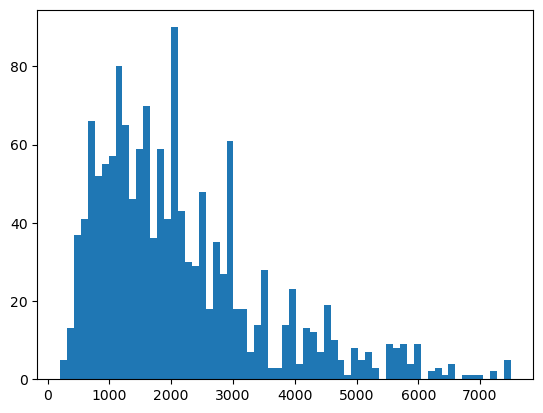

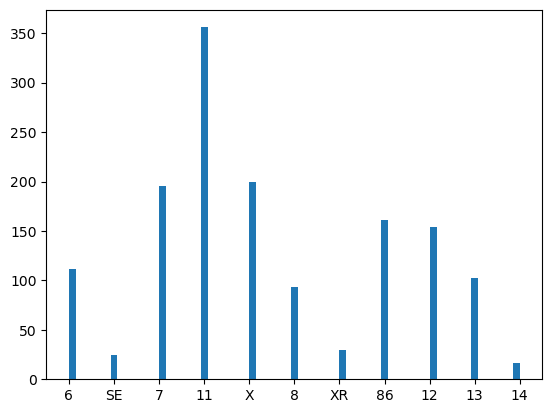

In [66]:
import matplotlib.pyplot as plt
plt.hist(mod_df['Valor'], bins=k)
plt.show()
plt.hist(mod_df['Modelo'], bins=k)
plt.show()

### Calculando o número ideal de bins k = sqrt(tamanho_do_dataset)

In [67]:
k = int(math.sqrt(dataSet_df.size))
k

65

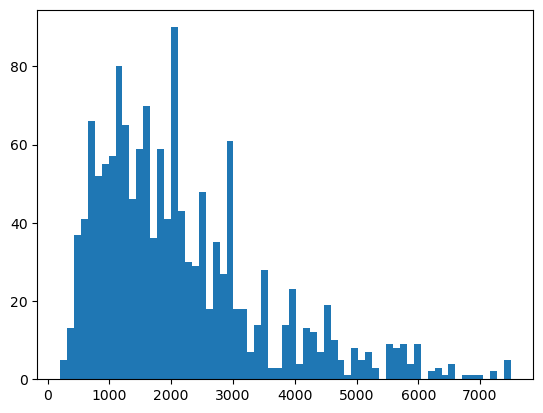

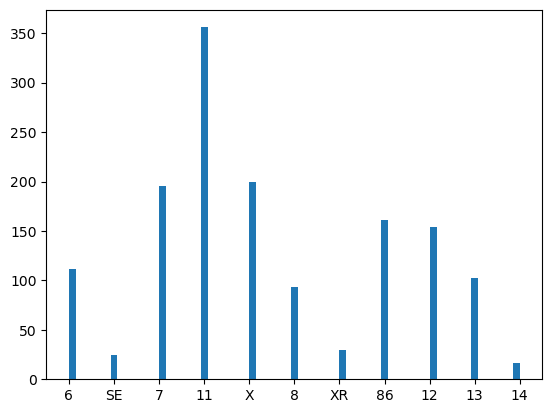

In [68]:
import matplotlib.pyplot as plt
plt.hist(mod_df['Valor'], bins=k)
plt.show()
plt.hist(mod_df['Modelo'], bins=k)
plt.show()

In [33]:
dataSet_df.to_csv('dataset.csv', index=False)

# Correlações

In [34]:
dataSet_df = pd.read_csv('./finalDataset.csv')

In [83]:
mod_df = pd.read_csv('./modelos.csv')

In [84]:
mod_df.apply(lambda x: x.factorize()[0]).corr()


,Modelo,Valor,Local
Modelo,1.000000,0.581449,0.144971
Valor,0.581449,1.000000,0.194045
Local,0.144971,0.194045,1.000000


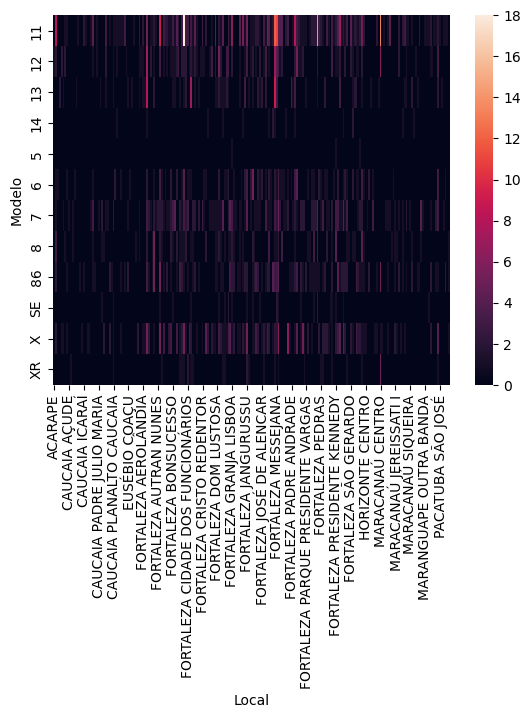

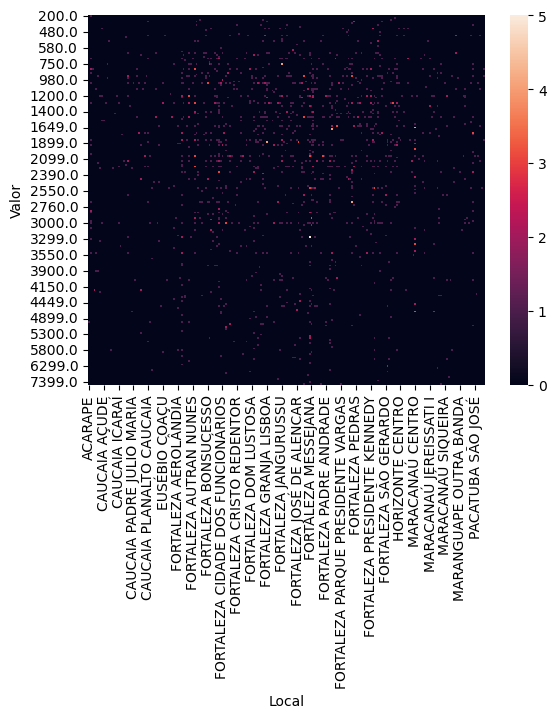

In [85]:
import seaborn as sns
import pylab as py

sns.heatmap(pd.crosstab(mod_df.Modelo,mod_df.Local))
py.show()
sns.heatmap(pd.crosstab(mod_df.Valor,mod_df.Local))
py.show()

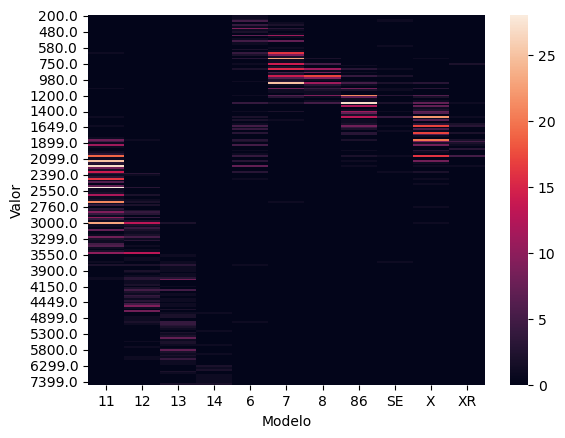

In [71]:
sns.heatmap(pd.crosstab(mod_df.Valor,mod_df.Modelo))
py.show()

# QQ-Plot

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random

In [39]:
housefly_z_df = stats.zscore(dataSet_df['Valor'])
housefly_z_df

0      -1.425418
1      -1.388921
2      -1.352424
3      -1.352424
4      -1.352424
          ...   
1439    3.829370
1440    3.903094
1441    3.903094
1442    3.903094
1443    3.903094
Name: Valor, Length: 1444, dtype: float64

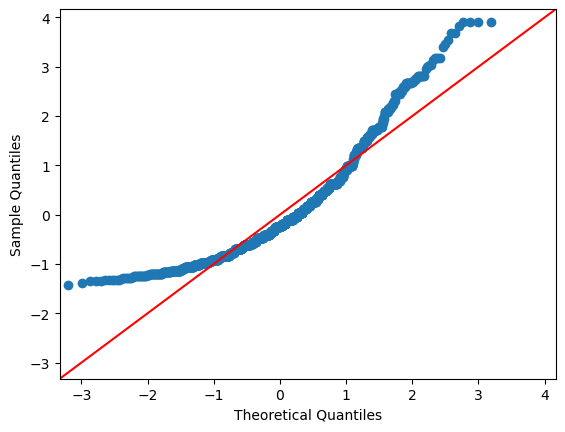

In [40]:
sm.qqplot(housefly_z_df, line ='45') 
py.show() 

# Teste de Normalidade

In [41]:
# Computando a Frequência Absoluta (Fabs) e colocando o resultado em um novo dataframe

table_df = dataSet_df.groupby(['Valor']).size().reset_index(name='Fabs')
table_df

,Valor,Fabs
0,200.0,1
1,250.0,1
2,300.0,3
3,350.0,6
4,380.0,1
...,...,...
204,6999.0,1
205,7190.0,1
206,7200.0,1
207,7399.0,1


In [42]:
# Renomeando a coluna de 0 para X_i (lê-se: x índice i)

newcols = {
    'Valor': 'Xi'
}
table_df.rename(columns=newcols, inplace=True)
table_df

,Xi,Fabs
0,200.0,1
1,250.0,1
2,300.0,3
3,350.0,6
4,380.0,1
...,...,...
204,6999.0,1
205,7190.0,1
206,7200.0,1
207,7399.0,1


In [43]:
# Calculando a Frequência Acumulada (Fac)

table_df['Fac'] = table_df['Fabs'].cumsum()
table_df

,Xi,Fabs,Fac
0,200.0,1,1
1,250.0,1,2
2,300.0,3,5
3,350.0,6,11
4,380.0,1,12
...,...,...,...
204,6999.0,1,1437
205,7190.0,1,1438
206,7200.0,1,1439
207,7399.0,1,1440


In [44]:
# Calculando a coluna Fracionária: Total acumulado dividido pelo valor máximo total

table_df['Frac'] = table_df['Fac']/table_df['Fac'].max()
table_df

,Xi,Fabs,Fac,Frac
0,200.0,1,1,0.000693
1,250.0,1,2,0.001385
2,300.0,3,5,0.003463
3,350.0,6,11,0.007618
4,380.0,1,12,0.008310
...,...,...,...,...
204,6999.0,1,1437,0.995152
205,7190.0,1,1438,0.995845
206,7200.0,1,1439,0.996537
207,7399.0,1,1440,0.997230


In [45]:
# Calculando a média 

mean = dataSet_df['Valor'].mean()
mean

2152.8060941828253

In [46]:
# Calculando o desvio padrão

std = dataSet_df['Valor'].std()
std

1370.4632320292249

In [47]:
# Agora vamos normalizar os dados de X_i para Z_i
# A normalização Z é dada por subtrair de cada elemento a média e dividir pelo desvio padrão

table_df['Zi'] = table_df['Xi'].apply(lambda x: (x - mean)/std)
table_df

,Xi,Fabs,Fac,Frac,Zi
0,200.0,1,1,0.000693,-1.424924
1,250.0,1,2,0.001385,-1.388440
2,300.0,3,5,0.003463,-1.351956
3,350.0,6,11,0.007618,-1.315472
4,380.0,1,12,0.008310,-1.293582
...,...,...,...,...,...
204,6999.0,1,1437,0.995152,3.536172
205,7190.0,1,1438,0.995845,3.675541
206,7200.0,1,1439,0.996537,3.682838
207,7399.0,1,1440,0.997230,3.828044


In [48]:
import scipy.special as scsp
def zScoreToPvalue(z):
    # Retornar p-value a partir do z-score
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))

In [49]:
table_df['FracEsp'] = table_df['Zi'].apply(lambda x: zScoreToPvalue(x))
table_df

,Xi,Fabs,Fac,Frac,Zi,FracEsp
0,200.0,1,1,0.000693,-1.424924,0.077090
1,250.0,1,2,0.001385,-1.388440,0.082502
2,300.0,3,5,0.003463,-1.351956,0.088195
3,350.0,6,11,0.007618,-1.315472,0.094176
4,380.0,1,12,0.008310,-1.293582,0.097905
...,...,...,...,...,...,...
204,6999.0,1,1437,0.995152,3.536172,0.999797
205,7190.0,1,1438,0.995845,3.675541,0.999881
206,7200.0,1,1439,0.996537,3.682838,0.999885
207,7399.0,1,1440,0.997230,3.828044,0.999935


In [50]:
# Result1 = FracEsp - Frac
table_df['D_negativo'] = abs(table_df['FracEsp']-table_df['Frac'])
table_df

,Xi,Fabs,Fac,Frac,Zi,FracEsp,D_negativo
0,200.0,1,1,0.000693,-1.424924,0.077090,0.076397
1,250.0,1,2,0.001385,-1.388440,0.082502,0.081116
2,300.0,3,5,0.003463,-1.351956,0.088195,0.084732
3,350.0,6,11,0.007618,-1.315472,0.094176,0.086558
4,380.0,1,12,0.008310,-1.293582,0.097905,0.089595
...,...,...,...,...,...,...,...
204,6999.0,1,1437,0.995152,3.536172,0.999797,0.004645
205,7190.0,1,1438,0.995845,3.675541,0.999881,0.004036
206,7200.0,1,1439,0.996537,3.682838,0.999885,0.003347
207,7399.0,1,1440,0.997230,3.828044,0.999935,0.002706


In [51]:
# Criando uma coluna de zeros 
table_df['D_positivo'] = 0
table_df

,Xi,Fabs,Fac,Frac,Zi,FracEsp,D_negativo,D_positivo
0,200.0,1,1,0.000693,-1.424924,0.077090,0.076397,0
1,250.0,1,2,0.001385,-1.388440,0.082502,0.081116,0
2,300.0,3,5,0.003463,-1.351956,0.088195,0.084732,0
3,350.0,6,11,0.007618,-1.315472,0.094176,0.086558,0
4,380.0,1,12,0.008310,-1.293582,0.097905,0.089595,0
...,...,...,...,...,...,...,...,...
204,6999.0,1,1437,0.995152,3.536172,0.999797,0.004645,0
205,7190.0,1,1438,0.995845,3.675541,0.999881,0.004036,0
206,7200.0,1,1439,0.996537,3.682838,0.999885,0.003347,0
207,7399.0,1,1440,0.997230,3.828044,0.999935,0.002706,0


In [52]:
for i in range(table_df['Frac'].shape[0]):
    if i > 0:
        table_df['D_positivo'].iloc[i] = table_df['FracEsp'].iloc[i] - table_df['Frac'].iloc[i-1]
    else:
        table_df['D_positivo'].iloc[i] = table_df['FracEsp'].iloc[i]

C:\Users\moura\AppData\Local\Temp\ipykernel_15376\732412863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['D_positivo'].iloc[i] = table_df['FracEsp'].iloc[i]


In [53]:
table_df

,Xi,Fabs,Fac,Frac,Zi,FracEsp,D_negativo,D_positivo
0,200.0,1,1,0.000693,-1.424924,0.077090,0.076397,0.077090
1,250.0,1,2,0.001385,-1.388440,0.082502,0.081116,0.081809
2,300.0,3,5,0.003463,-1.351956,0.088195,0.084732,0.086810
3,350.0,6,11,0.007618,-1.315472,0.094176,0.086558,0.090713
4,380.0,1,12,0.008310,-1.293582,0.097905,0.089595,0.090287
...,...,...,...,...,...,...,...,...
204,6999.0,1,1437,0.995152,3.536172,0.999797,0.004645,0.005337
205,7190.0,1,1438,0.995845,3.675541,0.999881,0.004036,0.004729
206,7200.0,1,1439,0.996537,3.682838,0.999885,0.003347,0.004040
207,7399.0,1,1440,0.997230,3.828044,0.999935,0.002706,0.003398


In [54]:
# Calcular o máximo valor da coluna Result1 e depois o máximo da coluna Result 2
# E, por fim, retornar o maior dos dois
D = ( table_df[['D_negativo','D_positivo']].max() ).max()
D

0.12125971239059508

In [55]:
from scipy.stats import ksone

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

In [56]:
# n-trials: quantidade de dados
# alpha: Um bom valor para o nível de significância do teste é com um alfa = 0,05 para assegurar 95% de confiança
p_value = ks_critical_value(dataSet_df.shape[0], 0.05)
p_value

0.035621967568563256

In [57]:
if D < p_value:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


In [86]:
y_std = stats.zscore(dataSet_df['Valor'])
print(y_std)
D, p = stats.kstest(y_std, 'norm', alternative='greater')
print("D = {} | p = {}".format(D, p))
if D < p:
    print('Os dados seguem uma distribuição normal.')
else:
    print('Os dados não seguem uma distribuição normal.')

0      -1.425418
1      -1.388921
2      -1.352424
3      -1.352424
4      -1.352424
          ...   
1439    3.829370
1440    3.903094
1441    3.903094
1442    3.903094
1443    3.903094
Name: Valor, Length: 1444, dtype: float64
D = 0.12127502718811023 | p = 2.883255201881088e-19
Os dados não seguem uma distribuição normal.


# Best Fit Distribution

In [72]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [73]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [78]:
y_std_valor = stats.zscore(dataSet_df['Valor'])

In [79]:
def check_distribution(dist_names, y_std_valor):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std_valor)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std_valor, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std_valor, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [80]:
check_distribution(dist_names, y_std_valor)

E:\Documents\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value  D<p
0          beta  0.030668   1.295168e-01  yes
5      pearson3  0.030725   1.282028e-01  yes
2         gamma  0.030734   1.280120e-01  yes
3       lognorm  0.036932   3.796015e-02  yes
9   weibull_min  0.047285   3.034165e-03   no
10  weibull_max  0.054658   3.437364e-04   no
6             t  0.100111   4.736739e-13   no
4          norm  0.121275   2.883255e-19   no
1         expon  0.153048   5.335071e-30   no
7        triang  0.209587   4.007692e-56   no
8       uniform  0.421840  1.711265e-233   no


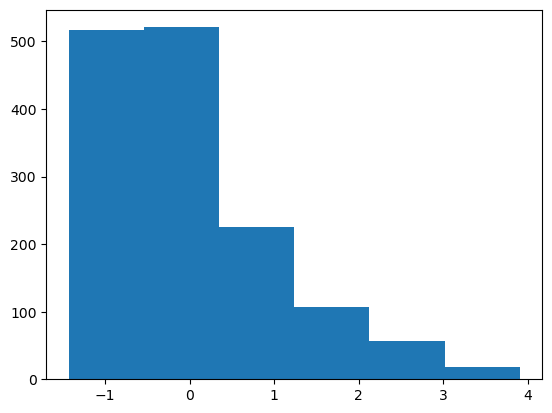

In [82]:
plt.hist(y_std_valor,bins=6)
plt.show()